# Pulsar Star Prediction

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

In [42]:
#Importing dependencies
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow import keras
import itertools
import seaborn as sns

In [43]:
#Reading the data using pandas
data = pd.read_csv("pulsar_stars.csv")

In [44]:
#Printing the column names / features, based on which predictions are made
data.head()
list(data.columns.values)

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

## Here is a brief desccription of the data

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.

Class
HTRU 2 
Summary: 17,898 total examples; 1,639 positive examples; 16,259 negative examples.

In [45]:
columns = " Mean of the integrated profile, Standard deviation of the integrated profile, Excess kurtosis of the integrated profile, Skewness of the integrated profile, Mean of the DM-SNR curve, Standard deviation of the DM-SNR curve, Excess kurtosis of the DM-SNR curve, Skewness of the DM-SNR curve,target_class".split(',')
#print(columns)

In [46]:
df = pd.DataFrame(data, columns = columns)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Plotting the distribution of the Variables in Data Set
(Similar to the plotting in the data set given in Kaggle)

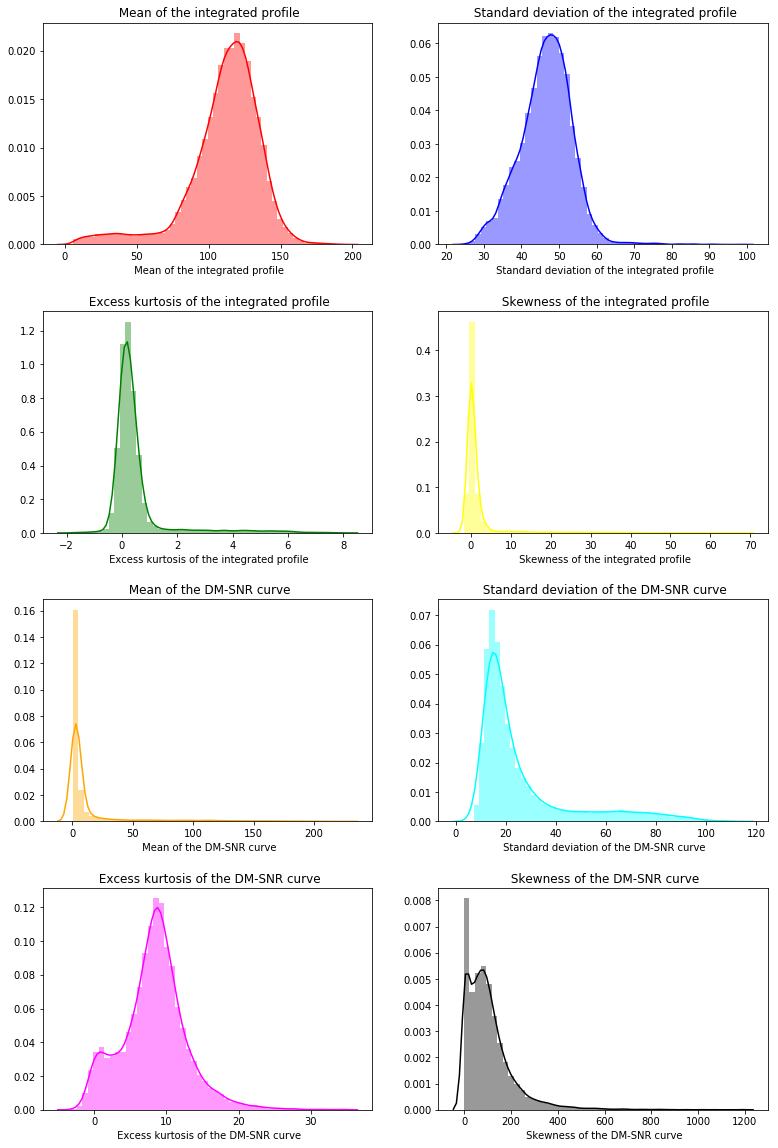

In [47]:
columns.pop(8)
l  = len(columns)
colors  = ["red","blue","green","yellow","orange","cyan","magenta","black"] 

#Plotting the graphs
plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(l),colors):
    plt.subplot(l/2,l/4,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)

## Pair Plot Between all the variables

In [48]:
feature_name=[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']
x = data[feature_name]
y = data["target_class"]

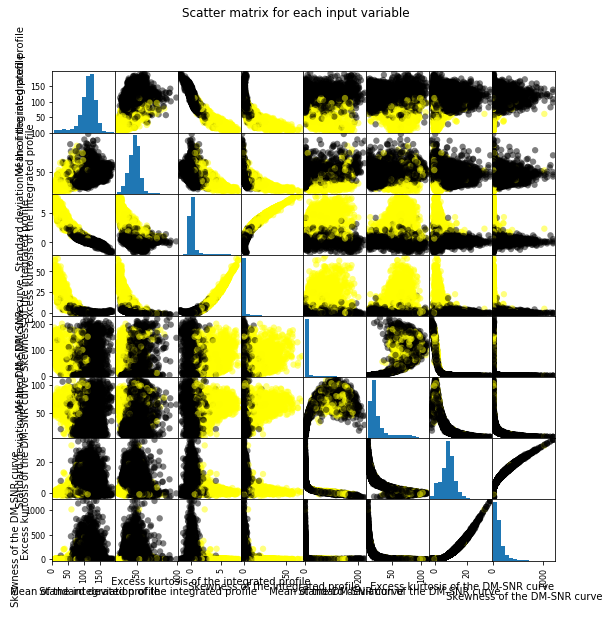

In [49]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x, c=y, marker='o', s=40, hist_kwds = {'bins': 15}, figsize=(9,9), cmap=cmap)

#Plotting the graphs
plt.suptitle("Scatter matrix for each input variable")
plt.show()

In [50]:
#Printing the unique values of the class to be predicted
print(y.unique())

[0 1]


## Splitting the Data Set
The Data Set is split in to 75 : 25 ratio. 75% of the data is for the training phase and the rest 25% for testing the model after completion of training.
The data corresponding to Pulsar Stars and Non-Pulsar Stars is of the ratio of around 1 : 10 and the data is evenly distributed. So the data set is not shuffled. 

In [51]:
#Splitting the data set using the train_test_split()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [52]:
#Printing the shape of the target class for both the traing phase and the testing phase.
print(y_train.shape)
print(y_test.shape)

(13423,)
(4475,)


## Thus, in the  training phase we have 13423 data and in the testing phase we have 4475 data

In [53]:
#Converting the target values to labelled data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# The Neural Network Architecture

Our Simple Neural Network is divided in 5 layers. Each layer has a certain no of neurons: 

Layer Name:       "Input Layer" --> "Hidden Layer 1" --> "Hidden Layer 2" --> "Hidden Layer 3" --> "Output Layer"
No. of Neuraons:  8 (Input size)          128                   64                   20                   2

The model is built by stacking dense layer one after another. I have avoided using Dropout in the network.

Note: The code for building the model is commented, because I have pre-trained the network with high accuracy, that will be loaded into, as the "model".

In [54]:
'''
model = tf.keras.models.Sequential()
layer1 = tf.keras.layers.Dense(128, input_shape = [8])
model.add(layer1)
layer2 = tf.keras.layers.Dense(64)
model.add(layer2)
layer3 = tf.keras.layers.Dense(20)
model.add(layer3)
model.add(tf.keras.layers.Dense(2, activation="softmax"))
'''

'\nmodel = tf.keras.models.Sequential()\nlayer1 = tf.keras.layers.Dense(128, input_shape = [8])\nmodel.add(layer1)\nlayer2 = tf.keras.layers.Dense(64)\nmodel.add(layer2)\nlayer3 = tf.keras.layers.Dense(20)\nmodel.add(layer3)\nmodel.add(tf.keras.layers.Dense(2, activation="softmax"))\n'

## Defining the parameters

As for optimizer, I have opted for the "Adam Optimizer" with the default values as provided in the original papers.
The "Mean Squared Error" is being used as the Loss function.

In [55]:
'''
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
'''

"\nmodel.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])\n"

## Loding a pre-trained model

In [56]:

model = keras.models.load_model('pulsar_star_predict_model.h5')


In [57]:
#Printing the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 20)                1300      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 42        
Total params: 10,750
Trainable params: 10,750
Non-trainable params: 0
_________________________________________________________________


In [58]:
#Trainig the model on the data.
#Here I am using a small epoch to complete the training as fast as possible
trained_model = model.fit(x_train, y_train, epochs = 250)

Epoch 1/250
13423/13423 [==============================] - 3s 188us/step - loss: 0.0261 - acc: 0.9739
Epoch 2/250
13423/13423 [==============================] - 2s 122us/step - loss: 0.0261 - acc: 0.9739 1s - loss: 0.0263 - acc: 0. - ETA: 1s - loss: 
Epoch 3/250
13423/13423 [==============================] - 2s 119us/step - loss: 0.0261 - acc: 0.9739
Epoch 4/250
13423/13423 [==============================] - 2s 126us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0259 - acc: 0.97
Epoch 5/250
13423/13423 [==============================] - 2s 132us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0257 - acc: 0.97
Epoch 6/250
13423/13423 [==============================] - 2s 125us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0267 - acc: 
Epoch 7/250
13423/13423 [==============================] - 1s 106us/step - loss: 0.0261 - acc: 0.9739
Epoch 8/250
13423/13423 [==============================] - 2s 118us/step - loss: 0.0261 - acc: 0.9739
Epoch 9/250
13423/13423 [==========================

13423/13423 [==============================] - 2s 144us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0258 - acc
Epoch 77/250
13423/13423 [==============================] - 2s 157us/step - loss: 0.0261 - acc: 0.9739
Epoch 78/250
13423/13423 [==============================] - 2s 139us/step - loss: 0.0261 - acc: 0.9739ETA: 5s - loss: 0.0187 - ETA: 1s - loss: 0.0
Epoch 79/250
13423/13423 [==============================] - 1s 106us/step - loss: 0.0261 - acc: 0.9739
Epoch 80/250
13423/13423 [==============================] - 2s 132us/step - loss: 0.0261 - acc: 0.9739
Epoch 81/250
13423/13423 [==============================] - 2s 151us/step - loss: 0.0261 - acc: 0.9739
Epoch 82/250
13423/13423 [==============================] - 2s 133us/step - loss: 0.0261 - acc: 0.9739
Epoch 83/250
13423/13423 [==============================] - 2s 118us/step - loss: 0.0261 - acc: 0.9739 1s - 
Epoch 84/250
13423/13423 [==============================] - 2s 126us/step - loss: 0.0261 - acc: 0.9739
Epoch 85/250

13423/13423 [==============================] - 2s 159us/step - loss: 0.0261 - acc: 0.9739 1s - loss: 0.0268 -  - ETA: 0s - loss: 0.0267 - 
Epoch 152/250
13423/13423 [==============================] - 2s 136us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0256 - acc: 0
Epoch 153/250
13423/13423 [==============================] - 2s 154us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0258
Epoch 154/250
13423/13423 [==============================] - 2s 133us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0
Epoch 155/250
13423/13423 [==============================] - 2s 130us/step - loss: 0.0261 - acc: 0.9739
Epoch 156/250
13423/13423 [==============================] - 2s 117us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0246 - ac
Epoch 157/250
13423/13423 [==============================] - 2s 126us/step - loss: 0.0261 - acc: 0.9739
Epoch 158/250
13423/13423 [==============================] - 2s 166us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0268 - acc: 0. - ETA: 0s - loss: 0.02

13423/13423 [==============================] - 2s 179us/step - loss: 0.0261 - acc: 0.9739
Epoch 225/250
13423/13423 [==============================] - 2s 145us/step - loss: 0.0261 - acc: 0.9739 1s - lo
Epoch 226/250
13423/13423 [==============================] - 2s 136us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.02 - ETA: 0s - loss: 0.0264 - acc: 0
Epoch 227/250
13423/13423 [==============================] - 2s 137us/step - loss: 0.0261 - acc: 0.9739
Epoch 228/250
13423/13423 [==============================] - 2s 130us/step - loss: 0.0261 - acc: 0.9739
Epoch 229/250
13423/13423 [==============================] - 2s 150us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0267 - a - ETA: 0s - loss: 0.0257 - acc
Epoch 230/250
13423/13423 [==============================] - 2s 145us/step - loss: 0.0261 - acc: 0.9739
Epoch 231/250
13423/13423 [==============================] - 3s 195us/step - loss: 0.0261 - acc: 0.9739
Epoch 232/250
13423/13423 [==============================] - 2s 186us/s

In [59]:
#Evaluating the performance of the trained model on the test-data set
score = model.evaluate(x_test, y_test)

4475/4475 [==============================] - 1s 161us/step


In [60]:
print("Model score: ", score)

Model score:  [0.020782122906692867, 0.9792178772281668]


In [61]:
print(trained_model.history.keys())

dict_keys(['loss', 'acc'])


## Plotting the accuracy curve during the training of the model. 

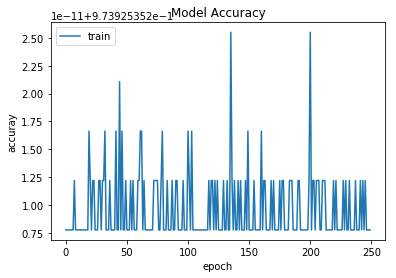

In [62]:
plt.plot(trained_model.history['acc'])
plt.title("Model Accuracy")
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [63]:
'''
#Saving the model
model.save('pulsar_star_predict_model.h5')
'''

"\n#Saving the model\nmodel.save('pulsar_star_predict_model.h5')\n"

# And, thats it. 